In [1]:
#Reference: https://builtin.com/data-science/time-series-python

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [45]:
#Importing the dataset
file = "/Users/whanerendo/Documents/Whaner/Omdena/alllines_ptl_complete.csv"
df = pd.read_csv(file, index_col='year_month')
df.index = pd.to_datetime(df.index)

In [46]:
df

,line,total,MDU (Business Days Mean),MSD (Saturdays Mean),MDO (Sundays Mean),MAX (Daily Max)
year_month,,,,,,
2018-08-01,3,38679000.0,1440000.0,884000.0,504000.0,1483000.0
2018-08-01,1,37775000.0,1420000.0,832000.0,446000.0,1466000.0
2018-08-01,15,516000.0,22000.0,3000.0,2000.0,23000.0
2018-08-01,2,18164000.0,701000.0,318000.0,194000.0,723000.0
2018-08-01,5,7220000.0,309000.0,176000.0,85000.0,322000.0
...,...,...,...,...,...,...
2023-04-01,2,14544000.0,649000.0,299000.0,189000.0,671000.0
2023-04-01,4,15070570.0,661450.0,338300.0,201580.0,701710.0
2023-04-01,5,11792220.0,510810.0,282420.0,160710.0,527250.0


In [47]:
df_blue = df[df['line'] == 1]
df_blue.columns

Index(['line', 'total', 'MDU (Business Days Mean)', 'MSD (Saturdays Mean)',
       'MDO (Sundays Mean)', 'MAX (Daily Max)'],
      dtype='object')

In [48]:
df_blue.drop(columns=['line', 'MDU (Business Days Mean)', 'MSD (Saturdays Mean)', 'MDO (Sundays Mean)', 'MAX (Daily Max)'], inplace=True)

/var/folders/mv/3fbmbyms54554zycfx27xsth0000gn/T/ipykernel_2557/174688470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_blue.drop(columns=['line', 'MDU (Business Days Mean)', 'MSD (Saturdays Mean)', 'MDO (Sundays Mean)', 'MAX (Daily Max)'], inplace=True)


In [49]:
df_blue

,total
year_month,
2018-08-01,37775000.0
2018-09-01,34371000.0
2018-10-01,38308000.0
2018-11-01,35499000.0
2018-12-01,34213000.0
2019-01-01,32037000.0
2019-02-01,34705000.0
2019-03-01,36580000.0
2019-04-01,37571000.0


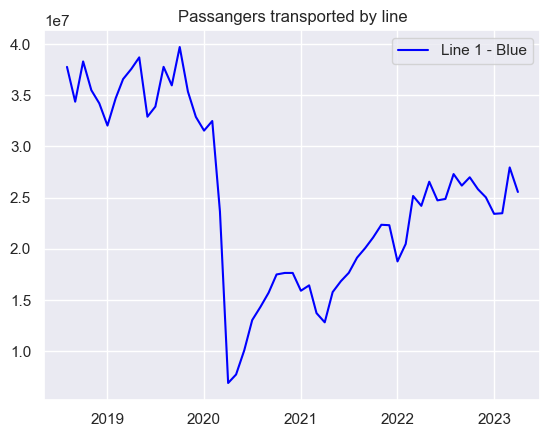

<Figure size 3000x500 with 0 Axes>

In [73]:
plt.plot(df_blue.index, df_blue.loc[:,'total'], label='Line 1 - Blue', color='blue')
#plt.plot(df[df['line'] == 2].index, df[df['line'] == 2].loc[:,'total'], label='Line 2 - Green', color='green')
#plt.plot(df[df['line'] == 3].index, df[df['line'] == 3].loc[:,'total'], label='Line 3 - Red', color='red')
#plt.plot(df[df['line'] == 15].index, df[df['line'] == 15].loc[:,'total'], label='Line 15 - Siver', color='gray')
plt.legend()
plt.title('Passangers transported by line')
plt.figure(figsize=(30,5))
plt.show()

In [51]:
rolling_mean = df_blue.loc[:,'total'].rolling(7).mean()
rolling_std = df_blue.loc[:,'total'].rolling(7).std()

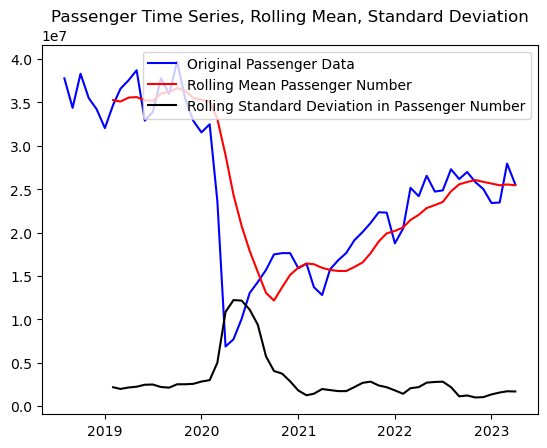

In [52]:
plt.plot(df_blue.index, df_blue.loc[:,'total'], color="blue",label="Original Passenger Data")
plt.plot(rolling_mean, color="red", label="Rolling Mean Passenger Number")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Passenger Number")
plt.title("Passenger Time Series, Rolling Mean, Standard Deviation")
plt.legend(loc="best")
plt.show()

In [53]:
from statsmodels.tsa.stattools import adfuller

In [54]:
adft = adfuller(df_blue,autolag="AIC")

In [55]:
output_df_blue = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df_blue)

      Values                       Metric
0  -1.842498              Test Statistics
1   0.359576                      p-value
2   1.000000             No. of lags used
3  55.000000  Number of observations used
4  -3.555273          critical value (1%)
5  -2.915731          critical value (5%)
6  -2.595670         critical value (10%)


In [56]:
autocorrelation_lag1 = df_blue['total'].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)

One Month Lag:  0.9248064697356755


In [57]:
autocorrelation_lag3 = df_blue['total'].autocorr(lag=3)
print("Three Month Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = df_blue['total'].autocorr(lag=6)
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = df_blue['total'].autocorr(lag=9)
print("Nine Month Lag: ", autocorrelation_lag9)

Three Month Lag:  0.743216158926835
Six Month Lag:  0.5026906922592198
Nine Month Lag:  0.3225592625384309


In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

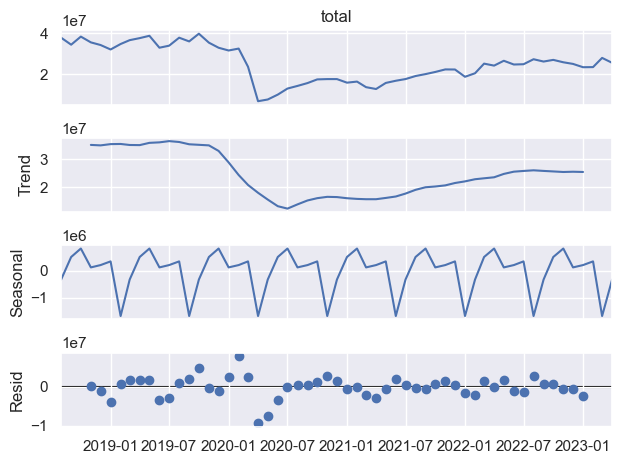

In [80]:
decompose = seasonal_decompose(df_blue['total'],model='additive', period=7)
decompose.plot()
plt.show()

/var/folders/mv/3fbmbyms54554zycfx27xsth0000gn/T/ipykernel_2557/2692586074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_blue['year_month'] = df_blue.index
/var/folders/mv/3fbmbyms54554zycfx27xsth0000gn/T/ipykernel_2557/2692586074.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['total']
/var/folders/mv/3fbmbyms54554zycfx27xsth0000gn/T/ipykernel_2557/2692586074.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

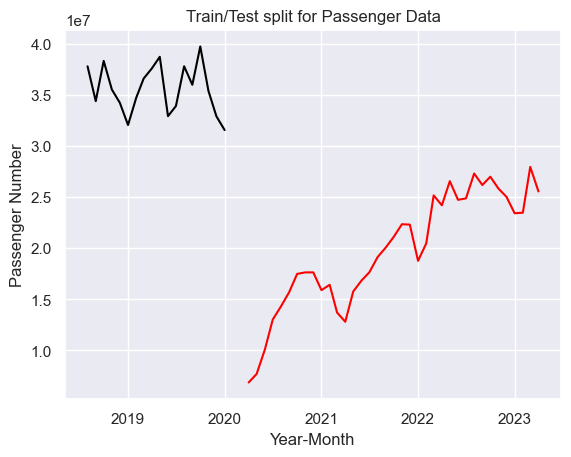

In [77]:
df_blue['year_month'] = df_blue.index
train = df_blue[df_blue['year_month'] < pd.to_datetime("2020-02", format='%Y-%m')]
train['train'] = train['total']
del train['year_month']
del train['total']
test = df_blue[df_blue['year_month'] >= pd.to_datetime("2020-04", format='%Y-%m')]
del test['year_month']
test['test'] = test['total']
del test['total']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for Passenger Data")
plt.ylabel("Passenger Number")
plt.xlabel('Year-Month')
sns.set()
plt.show()

In [78]:
train

,train
year_month,
2018-08-01,37775000.0
2018-09-01,34371000.0
2018-10-01,38308000.0
2018-11-01,35499000.0
2018-12-01,34213000.0
2019-01-01,32037000.0
2019-02-01,34705000.0
2019-03-01,36580000.0
2019-04-01,37571000.0


In [66]:
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=615.962, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=616.677, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=617.114, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=716.514, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=619.034, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.314 seconds


In [67]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast))
print("RMSE: ", rms)

RMSE:  16495425.556944853


In [68]:
forecast

,Prediction
year_month,
2020-03-01,3.538432e+07
2020-04-01,3.538432e+07
2020-05-01,3.538432e+07
2020-06-01,3.538432e+07
2020-07-01,3.538432e+07
2020-08-01,3.538432e+07
2020-09-01,3.538432e+07
2020-10-01,3.538432e+07
2020-11-01,3.538432e+07
